Exploratory Data Analysis on Melbourne Housing

This exploratory data analysis examines the housing market in Melbourne, Australia using various types of charts created from matplotlib and seaborn. This analysis will analyze trends in the housing market related to price, land size, years built, property type, and location. Ultimately, this analysis seeks to determine trends that will be most useful to an investor.

First, pandas, matplotlib, and seaborn are imported into the notebook, along with the data contained in 'housing.csv'.

In [3]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Taking a brief glance at the first five rows and the columns of the .csv gives us an idea of what information is contained in the collected data and how each datapoint is measured.

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

In [7]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,6847.000000,6.847000e+03,6847.000000,6847.000000,6847.000000,6847.000000,6819.000000,6847.000000,6847.000000,6847.000000,6847.000000
mean,2.977070,1.079246e+06,10.124814,3104.269461,2.950343,1.592814,1.606541,463.281145,142.959226,1964.295312,7432.043523
std,0.969548,6.732188e+05,5.978374,91.079330,0.969828,0.713867,0.944278,569.612425,82.392850,36.691828,4348.513574
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.000000,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,165.000000,93.000000,1940.000000,4385.000000
50%,3.000000,8.925000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,402.000000,126.000000,1970.000000,6567.000000
75%,4.000000,1.336500e+06,13.000000,3148.000000,4.000000,2.000000,2.000000,640.000000,173.000000,2000.000000,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,9838.000000,1561.000000,2018.000000,21650.000000


The graph below illustrates the relationship between land size, price, and property type. As seen below, unit pricing maintains a relatively level price as land size increases. House pricing, however, experiences a dramatic price increase as the land size increases. This is important information for investors to evaluate as they prioritize land size and property type while maintaining a budget.

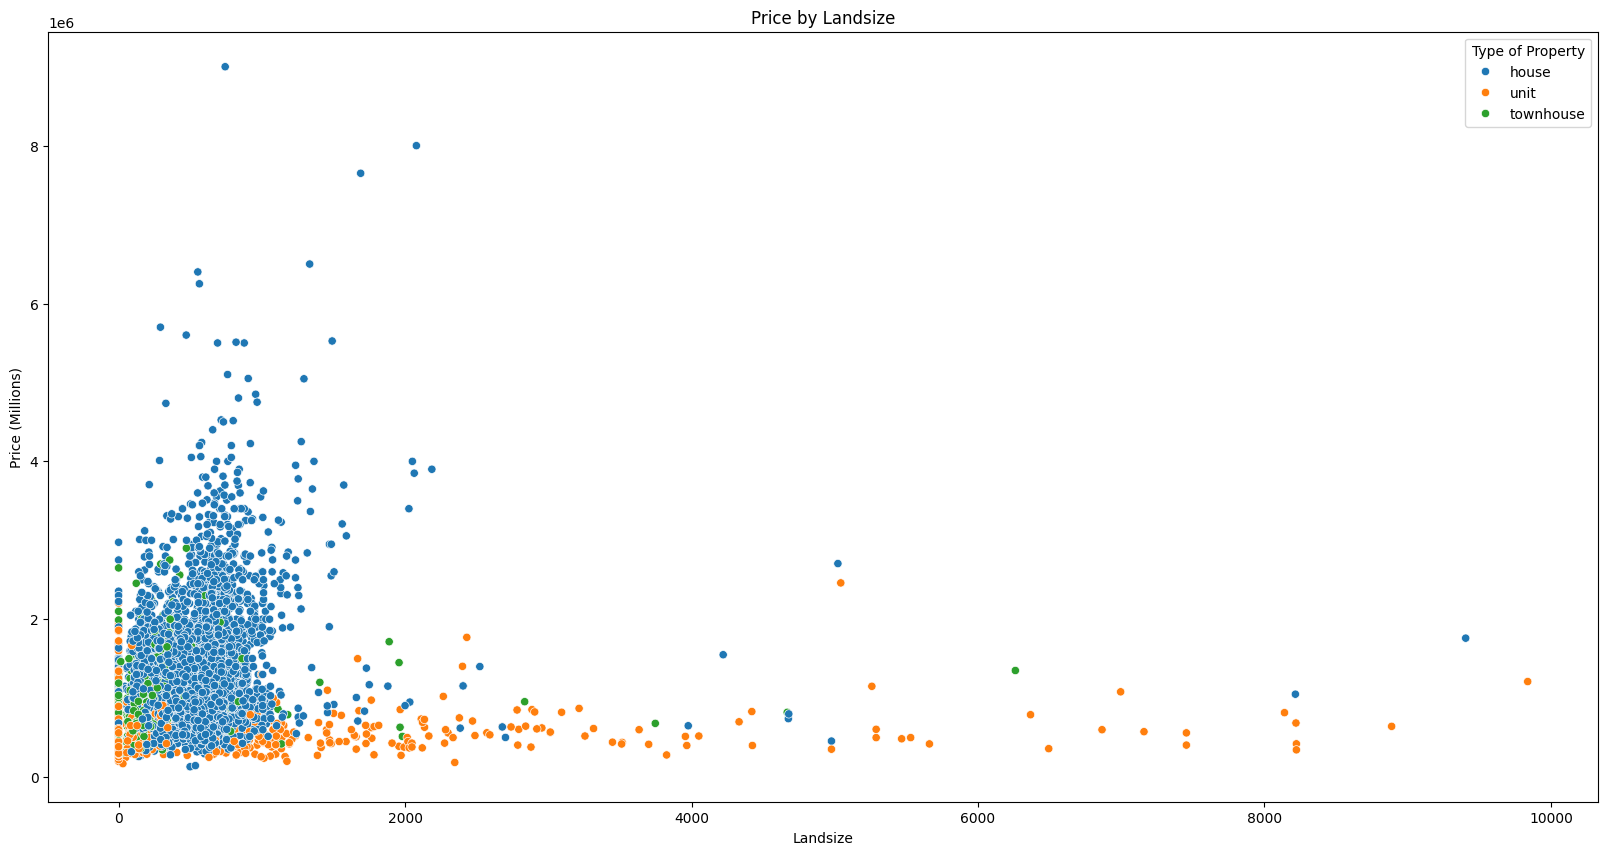

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Landsize',y='Price',data=df,hue='Type')
plt.title('Price by Landsize')
plt.ylabel('Price (Millions)')
plt.legend(title='Type of Property')
plt.show()


The line chart below illustrates the relationship between the average price of property and the year it was built. While there appears to be significant jumps in average pricing between the early 1800s and early 1900s, by the mid-1900s the average price begins to normalize. Overall, the general trend indicates that as the property becomes newer, the average price decreases. This indicates that investors who have more money to spend may wish to look at properties built earlier, while investors on a budget should consider investing in properties built more recently.

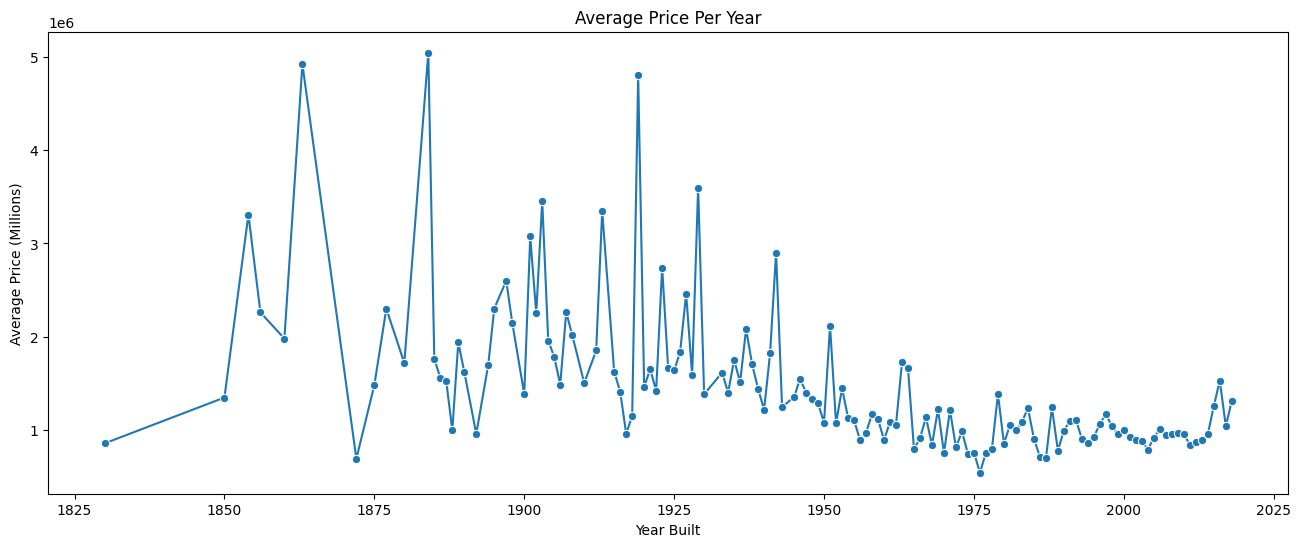

In [47]:
df_ppy = df[['YearBuilt','Price']].groupby('YearBuilt').mean('Price')
plt.figure(figsize=(16,6))
sns.lineplot(x='YearBuilt',y='Price',data=df_ppy,marker='o')
plt.ylabel('Average Price (Millions)')
plt.xlabel('Year Built')
plt.title('Average Price Per Year')
plt.show()

The bar chart below shows the average price in millions by the region the property is located in. As shown below, the Southern Metropolitan region appears to to have the highest average price of property, while the Western Victoria region has the lowest average price of property. This information is important for investors seeking property based on location.

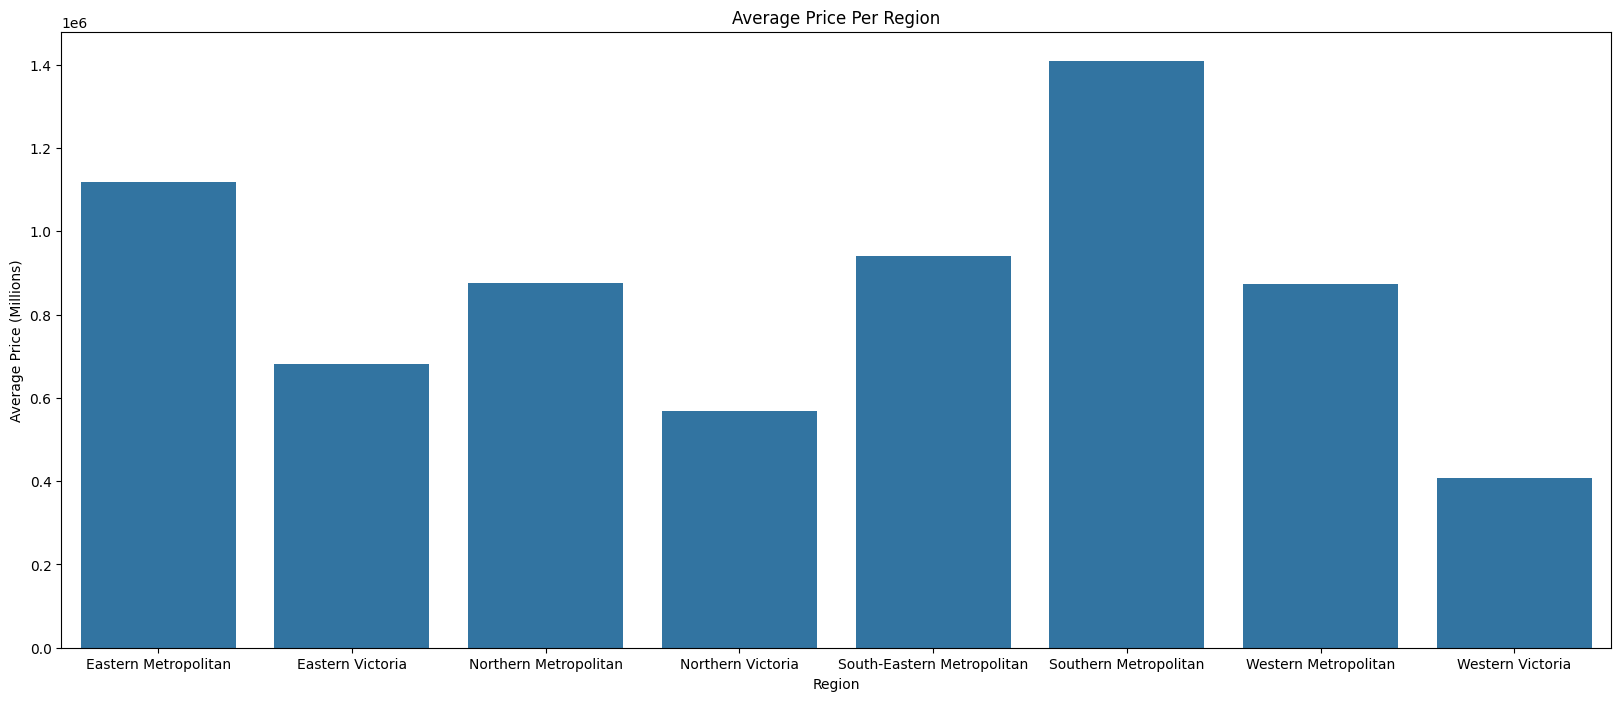

In [48]:
df_ppr = df[['Regionname','Price']].groupby('Regionname').mean('Price')

plt.figure(figsize=(20,8))
sns.barplot(x='Regionname',y='Price',data=df_ppr)
plt.ylabel('Average Price (Millions)')
plt.xlabel('Region')
plt.title('Average Price Per Region')
plt.show()

The histogram below illustrates the range of property prices. The data is right skewed, which shows that the price of property in Melbourne is generally between 1-2 million dollars, with a significantly smaller portion of property priced between 2-9 million dollars.

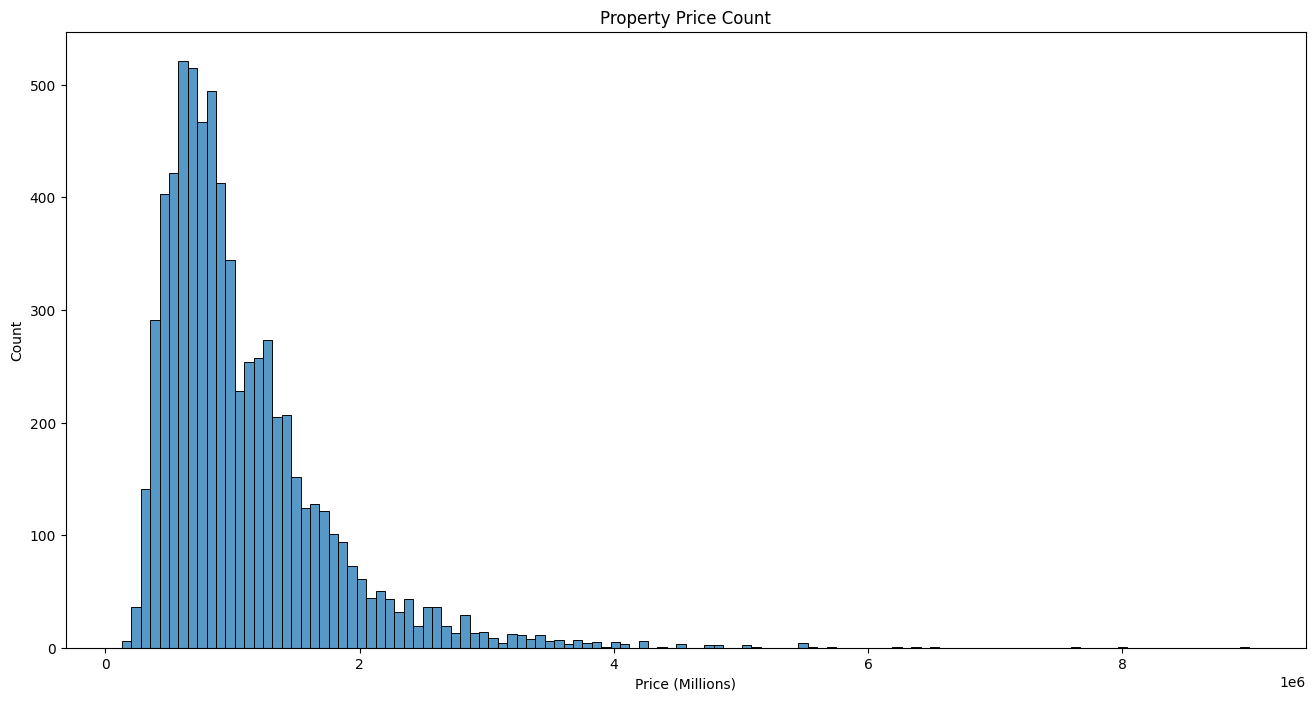

In [49]:
plt.figure(figsize=(16,8))
sns.histplot(x='Price',data=df)
plt.xlabel('Price (Millions)')
plt.title('Property Price Count')
plt.show()

The box plot below shows the range of years property was built by region. According to the box plot, the Northern Metropolitan region has the widest range of years property was built in, with the majority of the properties built between 1925 and 2000. The box plot also shows that the Western Victoria region has very few properties built after the year 2000. This information would be important to someone looking to invest in property that was built within a certain time frame and within a certain region. The boxplot illustrates where their efforts may be more fruitful.

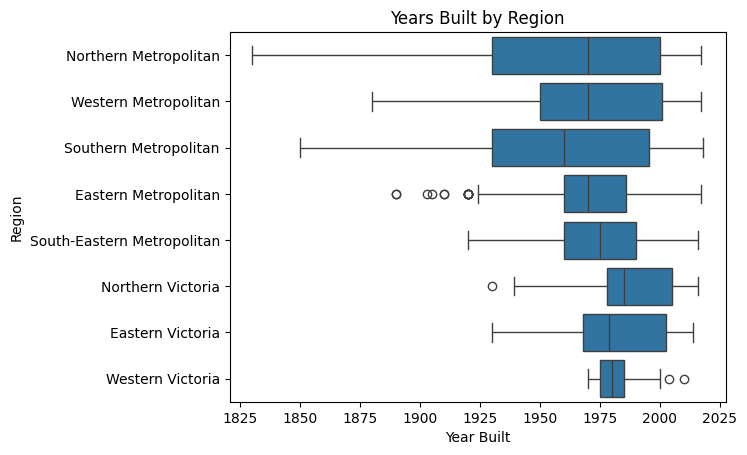

In [51]:
sns.boxplot(x='YearBuilt',y='Regionname',data=df)
plt.xlabel('Year Built')
plt.ylabel('Region')
plt.title('Years Built by Region')
plt.show()

Overall, this dataset on Melbourne housing illustrates the variety of ways property can be priced based on location, land size, and age. The charts and graphs produced above should allow investors to make decisions based on their priorities.